In [1]:
from VesicleShapesPietro import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Rparticle = 5
Rvesicle = 30.0
rpa = Rparticle / Rvesicle
A = 4 * np.pi * Rvesicle**2

k = 1.0  # bending rigidity
W = 0.1  # adhesion strength density J/m^2


phi = np.pi*0.2  # wrapping angle
Abo = 2 * np.pi * Rparticle**2 * (1 - np.cos(phi))  # check
Vbo = np.pi/3*Rparticle**3*(2+np.cos(phi))*(1-np.cos(phi))**2

sigma = 0.55
u0 = 1.0
ustar = 3
omega = 2
gammastar = 1
free_params_extended = [omega, sigma, u0, ustar, gammastar]

# Boundary conditions
psistar = np.pi + phi
xstar = rpa*np.sin(phi)
if xstar < 0.035:
    print(f"xstar:{xstar}")
    raise ValueError('xstar too small, can lead to divergences')
else:
    print(f"xstar:{xstar}")
Astar = (A-Abo)/(4*np.pi*Rvesicle**2)

xstar:0.09796420871541218


In [3]:
uf = ustar

In [5]:
s_init = InitialArcLength((omega, u0))
print(f"s_init:{s_init}")

# calculate initial values
z_init = InitialValues(s_init, (omega, u0, sigma, k))
print(f"approx init values:{z_init}")

# evaluation points for the solution
s = np.linspace(s_init, omega, 1000)
print("shape", s.shape)

sol = solve_ivp(ShapeIntegrator, t_span=[s_init, omega], y0=z_init, jac=ShapeJacobian, args=(
    omega, sigma), t_eval=s, method='Radau')
print(sol)

s_init:0.0176
approx init values:[0.03519745583786667, 0.999891584, 0.12163181058557332, 0.03519273096533333, 0.0003097280162474667]
shape (1000,)
  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 1.760e-02  1.958e-02]
        y: [[ 3.520e-02  1.250e-02]
            [ 9.999e-01  1.570e+00]
            [ 1.216e-01 -1.756e+01]
            [ 3.519e-02  3.582e-02]
            [ 3.097e-04  4.239e-04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 143202
     njev: 6582
      nlu: 39588


In [6]:
sol = solve_ivp(ShapeIntegrator, t_span=[s_init, omega], y0=z_init, jac=ShapeJacobian, args=(
    omega, sigma), method='RK23')
print(sol)

/usr/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 1.760e-02  1.767e-02 ...  1.980e-02  1.980e-02]
        y: [[ 3.520e-02  3.520e-02 ...  5.434e-09  5.432e-09]
            [ 9.999e-01  1.048e+00 ...  1.575e+00  1.565e+00]
            ...
            [ 3.519e-02  3.526e-02 ...  3.582e-02  3.582e-02]
            [ 3.097e-04  3.145e-04 ...  4.274e-04  4.274e-04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 13673
     njev: 0
      nlu: 0


In [9]:
sol = solve_ivp(ShapeIntegrator, t_span=[s_init, omega], y0=z_init, jac=ShapeJacobian, args=(
    omega, sigma), method='LSODA')
print(sol)

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1979682347359D-01   r2 =  0.1714041437004D-17
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1979682347360D-01   r2 =  0.1700231906482D-17
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1979682347360D-01   r2 =  0.1553743297950D-17
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1979682347360D-01   r2 =  0.1646551332468D-17
 lsoda--  warning..internal t (=r1) 

capi_return is NULL
Call-back cb_jac_in_lsoda__user__routines failed.


KeyboardInterrupt: 

In [10]:
len(sol.t)

4304

In [61]:
print(sol)

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 1.760e-02  1.760e-02 ...  1.980e-02  1.980e-02]
        y: [[ 3.520e-02  3.520e-02 ...  1.071e-08  1.071e-08]
            [ 9.999e-01  1.001e+00 ...  1.571e+00  1.571e+00]
            ...
            [ 3.519e-02  3.519e-02 ...  3.582e-02  3.582e-02]
            [ 3.097e-04  3.098e-04 ...  4.271e-04  4.271e-04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 36170
     njev: 3349
      nlu: 14305


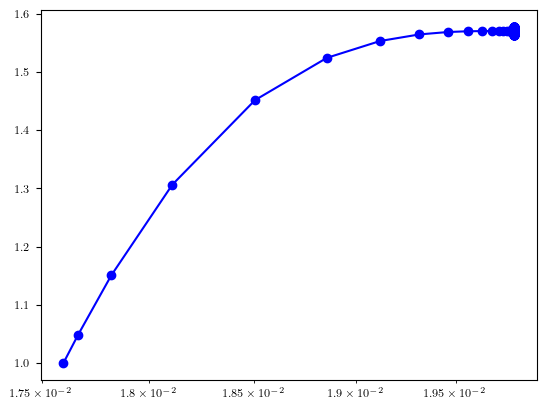

In [8]:
plt.semilogx(sol.t, sol.y[1, :], 'bo-')

In [54]:
sol.y[:, -1]

array([ 8.11491795e-09,  1.57068671e+00, -2.78257998e+04,  3.58207859e-02,
        4.27244810e-04])

# test when xstar is too small

In [34]:
Rparticle = 3
Rvesicle = 30
phi = np.pi/6
rpa = Rparticle / Rvesicle
xstar = rpa*np.sin(phi)
print(f"xstar:{xstar}")

xstar:0.049999999999999996
